# NumPy_2
## ufunc

In [1]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### ufun函數回傳值為計算後的結果，但仍然是陣列x

In [2]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [3]:
import matplotlib.pyplot as plt
plt.plot(y)

### 比較 math.sin() 與 np.sin() 的計算速度
### 單一數值計算，math.sin()較快，其他時候np.sin()比math.sin()快上快要10倍

In [4]:
import math
x = [i * 0.001 for i in range(1000000)]

def sin_math(x):
    for i, t in enumerate(x):
        x[i] = math.sin(t)
def sin_numpy(x):
    np.sin(x, x)
def sin_numpy_loop(x):
    for i, t in enumerate(x):
        x[i] = np.sin(t)
xl = x[:]
%time sin_math(x)

xa = np.array(x)
%time sin_numpy(xa)

xl = x[:]
%time sin_numpy_loop(x)

Wall time: 210 ms
Wall time: 10 ms
Wall time: 1.19 s


### ~.item()：取得陣列中的單一元素
### 在np陣列中單一數值與整個陣列的類型又有些許不同，須注意

In [5]:
a = np.arange(6.0).reshape(2, 3)
print(a.item(1, 2), type(a.item(1, 2)), type(a[1, 2]))

5.0 <class 'float'> <class 'numpy.float64'>


## np布林運算(AND OR NOT)：
### np.logical_~

In [6]:
a = np.arange(5)
b = np.arange(4, -1, -1)
print(a == b)
print(a > b)
print(np.logical_or(a == b, a > b)) # 相當於a >= b

[False False  True False False]
[False False False  True  True]
[False False  True  True  True]


### np.any()：只要陣列中有一個True就回傳True
### np.all()：陣列中需全部都為True才傳回True

In [7]:
np.any(a == b)
np.all(a == b)

True

False

## 自訂 ufunc 函數
### Ex.三角波

In [8]:
def triangle_wave(x, c, c0, hc):
    x -= int(x)
    
    if x > c: r = 0.0
    elif x < c0: r = (hc * x) / c0
    else: r = (hc * (c - x)) / (c - c0)
    return r

### 利用三角波函數計算並儲存在list中，再用array()將list轉換成陣列

In [9]:
x = np.linspace(0, 2, 1000)
y1 = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])

### np.frompyfunc(函數，輸入參數個數，輸出回傳值個數)：將單一計算值的函數轉換成能對陣列運算的ufunc函數

In [10]:
triangle_ufunc1 = np.frompyfunc(triangle_wave, 4, 1)
y2 = triangle_ufunc1(x, 0.6, 0.4, 1.0)

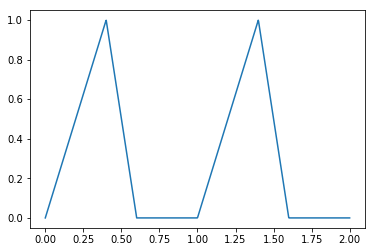

In [11]:
plt.plot(x, y2)

### 要注意的是，三角波函數傳回的元素類型是'object'，還要使用astype()將其轉換為float類型陣列

In [12]:
y2.dtype
y2.astype(np.float).dtype

dtype('O')

dtype('float64')

### 另一種轉換成ufunc的方式是使用vectorize()函數，透過otypes參數指定型別

In [13]:
triangle_ufunc2 = np.vectorize(triangle_wave, otypes=[np.float])
y3 = triangle_ufunc2(x, 0.6, 0.4, 1.0)

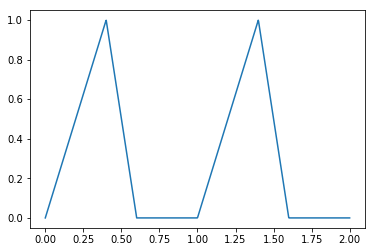

In [14]:
plt.plot(x, y3)

In [15]:
np.all(y1 == y2)
np.all(y2 == y3)

True

True

## 廣播

In [16]:
a = np.arange(0, 60, 10).reshape(-1, 1)
a
a.shape

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

(6, 1)

In [17]:
b = np.arange(0, 5)
b
b.shape

array([0, 1, 2, 3, 4])

(5,)

In [18]:
c = a + b
c
c.shape

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

(6, 5)

### 此相加過程相當於：
### (1)向a對齊

In [19]:
b.shape = 1, 5
b
b.shape

array([[0, 1, 2, 3, 4]])

(1, 5)

### (2)repeat()：沿著axis參數指定的軸，複製陣列中的元素值

In [20]:
b = b.repeat(6, axis=0)
b

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [21]:
a = a.repeat(5, axis=1)
a

array([[ 0,  0,  0,  0,  0],
       [10, 10, 10, 10, 10],
       [20, 20, 20, 20, 20],
       [30, 30, 30, 30, 30],
       [40, 40, 40, 40, 40],
       [50, 50, 50, 50, 50]])

### (3)相加：

In [22]:
a + b

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

### 然而NumPy並不會真的使用repeat()將長度1的軸進行擴充，會浪費記憶體，因此更常用於建立廣播陣列的方式是使用ogrid()，mgrid()
### ogrid()回傳的是廣播前的陣列，用來廣播計算，有兩種索引形式：
### (開始，結束，步進) <---------> np.arange()
### (開始，結束，長度 j ) <-------> np.linspace()

In [23]:
x, y = np.ogrid[:5, :5]
x # 垂直
y # 水平

array([[0],
       [1],
       [2],
       [3],
       [4]])

array([[0, 1, 2, 3, 4]])

In [24]:
x, y = np.ogrid[:1:4j, :1:3j]
x
y

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

array([[0. , 0.5, 1. ]])

### mgrid()回傳廣播後的陣列

In [25]:
x, y = np.mgrid[:5, :5]
x # 垂直
y # 水平

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

### Ex. 繪製3D曲面f(x, y) = x * e^(x^2 - y^2)

In [26]:
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x * np.exp( - x**2 - y**2)

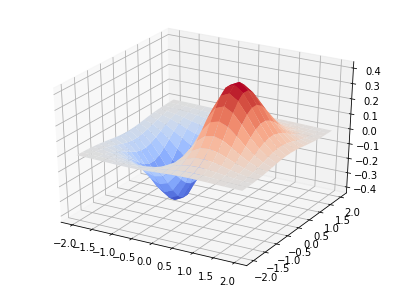

In [27]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pl

fig = pl.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0.2)

### 調整陣列形狀：索引None -----> 建立長度為1的新軸
### a[None, :] ----> a.reshape(1, -1)
### a[:, None] ----> a.reshape(-1, 1)

In [28]:
a = np.arange(4)
a[None, :]
a[:, None]

array([[0, 1, 2, 3]])

array([[0],
       [1],
       [2],
       [3]])

### None用於廣播運算

In [29]:
x = np.array([0, 1, 4, 10])
y = np.array([2, 3, 8])
x[None, :] + y[:, None]

array([[ 2,  3,  6, 12],
       [ 3,  4,  7, 13],
       [ 8,  9, 12, 18]])

### np.ix_(第 0 軸擴充，第 1 軸擴充)：將 一維陣列 ---> 二維陣列

In [30]:
gy, gx = np.ix_(y, x)
gx
gy
gx + gy

array([[ 0,  1,  4, 10]])

array([[2],
       [3],
       [8]])

array([[ 2,  3,  6, 12],
       [ 3,  4,  7, 13],
       [ 8,  9, 12, 18]])

## ufunc的方法
### reduce()方法：沿著axis軸上進行陣列運算

In [31]:
r1 = np.add.reduce([1, 2, 3]) # 1 + 2 + 3
r2 = np.add.reduce([[1, 2, 3], [4, 5, 6]], axis=1) # (1 + 2 + 3), (4 + 5 + 6)
r1
r2

6

array([ 6, 15])

### accumulate()方法：和reduce()方法類似，但回傳陣列與輸入陣列形狀相同，並儲存中間計算結果

In [32]:
a1 = np.add.accumulate([1, 2, 3])
a2 = np.add.accumulate([[1, 2, 3], [4, 5, 6]], axis=1)
a1
a2

array([1, 3, 6], dtype=int32)

array([[ 1,  3,  6],
       [ 4,  9, 15]], dtype=int32)

### reduceat()方法：計算多組reduce()結果，以indices指定起點位置，終點位置

In [33]:
a = np.array([1, 2, 3, 4])
result = np.add.reduceat(a, indices = [0, 1, 0, 2, 0, 3, 0])
result

array([ 1,  2,  3,  3,  6,  4, 10], dtype=int32)

### a[0] -> 1
### a[1] -> 2
### a[0] +a[1] -> 1 + 2 = 3
### a[2] -> 3
### a[0] +a[1] + a[2]-> 1 + 2 + 3 = 6
### a[3] -> 4
### a[0] +a[1] + a[2] + a[3]-> 1 + 2 + 3 + 4 = 10

### outer()方法：廣播乘法

In [34]:
np.multiply.outer([1, 2, 3, 4, 5], [2, 3, 4])

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12],
       [ 8, 12, 16],
       [10, 15, 20]])